In [23]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [24]:

df=pd.read_excel('sleeep_apnea_data.xlsx')

In [25]:
df.head()

,Gender,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI
0,M,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,2.903226
1,M,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1.022727
2,M,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,0.518359
3,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006
4,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006


In [26]:
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  5245
Columns  :  12

Features : 
 ['Gender', 'BQ', 'ESS', 'BMI', 'Weight', 'Height', 'Head', 'Neck', 'Waist', 'Buttock', 'Age', 'AHI']

Missing values :   5

Unique values :  
 Gender        2
BQ            4
ESS          31
BMI        2092
Weight      441
Height      120
Head        127
Neck        169
Waist       262
Buttock     212
Age          63
AHI        4387
dtype: int64


In [27]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   5245 non-null   object 
 1   BQ       5243 non-null   float64
 2   ESS      5244 non-null   float64
 3   BMI      5245 non-null   float64
 4   Weight   5245 non-null   float64
 5   Height   5245 non-null   float64
 6   Head     5245 non-null   float64
 7   Neck     5245 non-null   float64
 8   Waist    5245 non-null   float64
 9   Buttock  5243 non-null   float64
 10  Age      5245 non-null   float64
 11  AHI      5245 non-null   float64
dtypes: float64(11), object(1)
memory usage: 491.8+ KB


Gender     0
BQ         2
ESS        1
BMI        0
Weight     0
Height     0
Head       0
Neck       0
Waist      0
Buttock    2
Age        0
AHI        0
dtype: int64

In [28]:
df.describe()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI
count,5243.000000,5244.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5245.000000,5243.000000,5245.000000,5245.000000
mean,0.231928,10.177918,26.617869,75.519104,168.049094,56.433451,37.703125,91.213613,100.877284,45.363699,31.590983
std,0.442405,20.189258,5.366641,17.472181,8.148584,2.286539,4.197489,13.826014,9.732286,13.105781,28.138630
min,0.000000,0.000000,14.765497,37.000000,140.000000,36.500000,26.000000,56.000000,70.000000,20.000000,0.000000
25%,0.000000,6.000000,23.120624,64.000000,163.000000,55.000000,35.000000,83.000000,95.000000,35.000000,6.341463
50%,0.000000,10.000000,25.795918,74.000000,169.000000,56.500000,37.500000,90.000000,99.500000,45.000000,23.890000
75%,0.000000,14.000000,29.017447,85.000000,174.000000,58.000000,40.000000,98.500000,105.000000,55.000000,52.720000
max,9.000000,999.000000,60.232426,178.000000,198.000000,69.500000,60.000000,182.000000,179.000000,80.000000,143.922830


In [29]:
df.head()

,Gender,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI
0,M,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,2.903226
1,M,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1.022727
2,M,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,0.518359
3,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006
4,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006


In [30]:
dummies = pd.get_dummies(df.Gender)
dummies.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
merged = pd.concat([df,dummies],axis='columns')
merged.head()

,Gender,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI,F,M
0,M,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,2.903226,0,1
1,M,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1.022727,0,1
2,M,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,0.518359,0,1
3,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,0,1
4,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,0,1


In [32]:
final = merged.drop(['Gender'], axis='columns')
final


,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI,F,M
0,0.0,14.0,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,2.903226,0,1
1,0.0,8.0,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,1.022727,0,1
2,0.0,16.0,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,0.518359,0,1
3,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,0.559006,0,1
4,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,0.559006,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240,1.0,6.0,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,35.960000,1,0
5241,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,31.640000,1,0
5242,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,31.640000,1,0
5243,0.0,0.0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,35.110000,1,0


In [33]:
final = final.drop(['F'], axis='columns')
final.head()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI,M
0,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,2.903226,1
1,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1.022727,1
2,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,0.518359,1
3,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,1
4,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,1


In [34]:
def fun(num): 
  
    if num>=30: 
        return 3
    elif num in range (15,30):
        return 2
    elif num in range (5,15):
        return 1
    else:
        return 0
    

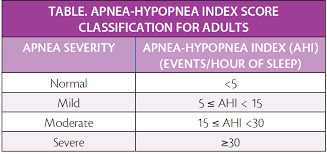

In [35]:
from IPython import display
display.Image("./img.png")

In [36]:
final['status']=final.AHI.apply(fun)
status=["Normal","Mild","Moderate","Severe"]

In [37]:
final.head()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI,M,status
0,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,2.903226,1,0
1,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1.022727,1,0
2,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,0.518359,1,0
3,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,1,0
4,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006,1,0


In [38]:
final = final.drop(['AHI'], axis='columns')
final.head(10)

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,1,0
1,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1,0
2,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,1,0
3,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0
4,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0
5,0.0,5.0,20.761246,60.0,170.0,56.0,35.0,68.0,90.0,20.0,1,0
6,0.0,12.0,22.656114,68.2,173.5,57.0,34.5,76.5,97.0,20.0,1,0
7,0.0,0.0,33.910035,98.0,170.0,57.0,39.0,108.0,123.0,20.0,1,3
8,0.0,9.0,24.489796,75.0,175.0,58.0,37.0,91.0,100.0,21.0,1,0
9,0.0,12.0,25.524316,72.9,169.0,56.5,38.5,88.0,97.5,21.0,1,0


In [162]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BQ       5243 non-null   float64
 1   ESS      5244 non-null   float64
 2   BMI      5245 non-null   float64
 3   Weight   5245 non-null   float64
 4   Height   5245 non-null   float64
 5   Head     5245 non-null   float64
 6   Neck     5245 non-null   float64
 7   Waist    5245 non-null   float64
 8   Buttock  5243 non-null   float64
 9   Age      5245 non-null   float64
 10  M        5245 non-null   uint8  
 11  status   5245 non-null   int64  
dtypes: float64(10), int64(1), uint8(1)
memory usage: 456.0 KB


In [163]:
print ('Rows     : ', final.shape[0])
print ('Columns  : ', final.shape[1])
print ('\nFeatures : \n', final.columns.tolist())
print ('\nMissing values :  ', final.isnull().sum().values.sum())
print ('\nUnique values :  \n', final.nunique())

Rows     :  5245
Columns  :  12

Features : 
 ['BQ', 'ESS', 'BMI', 'Weight', 'Height', 'Head', 'Neck', 'Waist', 'Buttock', 'Age', 'M', 'status']

Missing values :   5

Unique values :  
 BQ            4
ESS          31
BMI        2092
Weight      441
Height      120
Head        127
Neck        169
Waist       262
Buttock     212
Age          63
M             2
status        4
dtype: int64


0    2905
3    2310
1      17
2      13
Name: status, dtype: int64


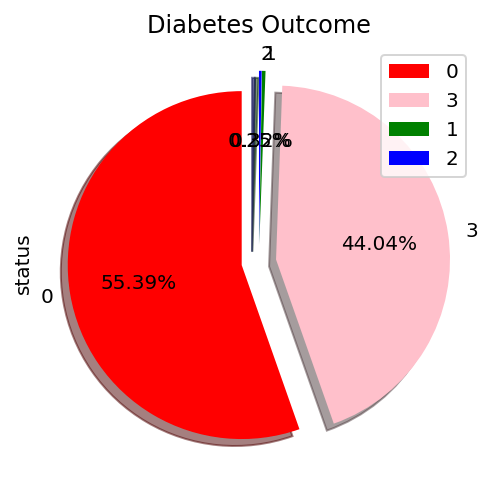

In [164]:
print(final.status.value_counts())
color=['r',"pink","green","blue"]
final['status'].value_counts().plot.pie(colors=color,startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%').set_title('Diabetes Outcome')
plt.legend()
plt.show()

In [165]:
a=(final.status.value_counts()[1] / final.status.count())*100
a=a.round(3)
a

0.324

In [166]:
b=(final.status.value_counts()[0] / final.status.count())*100
b=b.round(3)
b

55.386

In [167]:
c=(final.status.value_counts()[2] / final.status.count())*100
c=c.round(3)
c

0.248

In [168]:
d=(final.status.value_counts()[3] / final.status.count())*100
d=d.round(3)
d

44.042

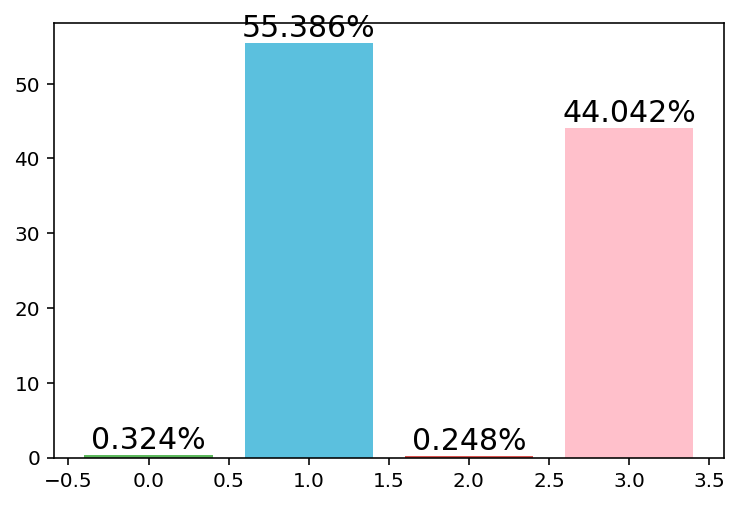

In [169]:
frequencies = (a,b,c,d)

plt.figure()
colors=['#5cb85c','#5bc0de','#d9534f','pink']
p1 = plt.bar(np.arange(len(frequencies)), frequencies,color=colors)

for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)

plt.show()

In [170]:
final

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0.0,14.0,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,1,0
1,0.0,8.0,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,1,0
2,0.0,16.0,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,1,0
3,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
4,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5240,1.0,6.0,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,0,3
5241,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5242,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5243,0.0,0.0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,0,3


In [171]:
final = final.dropna()
final.shape

(5241, 12)

### OUTLIER DETECTION AND REMOVAL USING PERCENTILE

In [172]:
final['BQ'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: BQ, dtype: float64

In [173]:
#quantile gives perecentile
max_thresold = final['BQ'].quantile(0.95)
max_thresold

1.0

In [174]:
final[final['BQ']>max_thresold]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
2545,9.0,0.0,24.622961,72.0,171.0,57.5,35.0,84.5,94.0,50.0,1,0
4626,5.0,2.0,17.146776,45.0,162.0,51.5,28.0,69.5,87.5,46.0,0,0


In [175]:
min_thresold = final['BQ'].quantile(0.05)
min_thresold

0.0

In [176]:
final[final['BQ']<min_thresold]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status


In [194]:
df_no_outlier = final[(final.BQ>min_thresold)&(final.BQ<max_thresold)]
df_no_outlier.shape

(0, 12)

In [195]:
max_thresold = final['ESS'].quantile(0.95)
max_thresold

20.0

In [196]:
final[final['ESS']>max_thresold]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
153,0.0,24.0,25.106333,85.0,184.0,57.0,36.5,89.0,107.0,25.0,1,0
155,0.0,22.0,37.448347,116.0,176.0,59.0,43.0,127.0,116.5,25.0,1,3
156,0.0,22.0,37.448347,116.0,176.0,59.0,43.0,127.0,116.5,25.0,1,3
194,0.0,24.0,28.650138,78.0,165.0,56.0,38.0,95.5,101.5,26.0,1,0
206,0.0,24.0,27.770313,93.0,183.0,58.0,38.0,95.0,111.0,26.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5084,0.0,22.0,27.111111,61.0,150.0,53.0,30.0,92.0,98.0,62.0,0,0
5178,1.0,22.0,29.667971,94.0,178.0,59.5,40.5,98.0,108.5,68.0,0,3
5187,0.0,22.0,26.562500,68.0,160.0,56.5,36.5,81.0,92.5,69.0,0,0
5205,0.0,21.0,22.600263,55.0,156.0,53.5,37.5,88.0,86.0,72.0,0,0


In [197]:
min_thresold = df['ESS'].quantile(0.05)
min_thresold

0.0

In [198]:
final[final['ESS']<min_thresold]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status


In [199]:
max_thresold = final['BMI'].quantile(0.95)
max_thresold

36.753650305723546

In [200]:
df_no_outlier = final[(final.ESS>min_thresold)&(final.ESS<max_thresold)]
df_no_outlier.shape

(4685, 12)

In [36]:
final[final['BMI']>max_thresold]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
25,1.0,9.0,39.116323,129.0,181.6,60.8,45.5,116.0,136.0,21.0,1,3
41,1.0,7.0,42.369889,135.0,178.5,57.0,44.2,130.0,124.0,22.0,1,0
48,0.0,8.0,39.917606,127.9,179.0,59.0,43.0,125.0,120.0,22.0,1,3
53,1.0,18.0,41.522491,120.0,170.0,61.0,47.0,131.5,126.5,22.0,1,3
55,0.0,12.0,40.999483,127.0,176.0,59.5,44.0,117.5,123.8,22.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4827,0.0,14.0,46.077003,110.7,155.0,57.0,37.0,147.0,147.0,52.0,0,0
4943,0.0,12.0,37.281910,101.5,165.0,56.2,33.5,120.0,126.0,56.0,0,3
5003,0.0,15.0,37.722908,99.0,162.0,56.9,43.0,128.0,122.5,58.0,0,3
5106,0.0,0.0,51.196670,123.0,155.0,52.0,40.0,142.0,144.0,63.0,0,3


In [37]:
min_thresold = df['BMI'].quantile(0.05)
min_thresold

19.564011470713464

In [38]:
final[final['BMI']<min_thresold]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
13,0.0,6.0,19.267171,57.0,172.0,58.0,34.0,72.0,86.0,21.0,1,0
18,0.0,16.0,17.832344,56.5,178.0,56.5,35.0,70.0,84.0,21.0,1,0
38,0.0,18.0,18.491124,45.0,156.0,54.0,32.5,63.0,81.5,22.0,1,0
40,0.0,9.0,18.818924,50.0,163.0,51.5,31.0,69.0,83.0,22.0,1,0
62,1.0,11.0,19.535423,64.0,181.0,55.0,37.0,87.0,94.0,23.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5192,1.0,9.0,17.419074,48.0,166.0,56.0,30.0,67.0,89.0,70.0,0,0
5209,1.0,9.0,18.552876,44.0,154.0,53.0,30.5,74.0,85.0,73.0,0,0
5225,1.0,13.0,18.222222,41.0,150.0,54.0,29.0,69.0,85.0,75.0,0,0
5235,0.0,14.0,18.818941,41.5,148.5,53.2,29.5,71.0,81.0,77.0,0,0


In [39]:
max_thresold = final['Weight'].quantile(0.95)
max_thresold

106.0

In [40]:
final[final['Weight']>max_thresold]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
25,1.0,9.0,39.116323,129.0,181.6,60.8,45.5,116.0,136.0,21.0,1,3
41,1.0,7.0,42.369889,135.0,178.5,57.0,44.2,130.0,124.0,22.0,1,0
48,0.0,8.0,39.917606,127.9,179.0,59.0,43.0,125.0,120.0,22.0,1,3
53,1.0,18.0,41.522491,120.0,170.0,61.0,47.0,131.5,126.5,22.0,1,3
55,0.0,12.0,40.999483,127.0,176.0,59.5,44.0,117.5,123.8,22.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.0,6.0,38.366381,107.0,167.0,55.0,38.0,114.0,121.0,44.0,0,0
4597,0.0,19.0,42.093664,114.6,165.0,53.2,39.0,108.5,119.5,44.0,0,3
4625,0.0,0.0,48.850916,123.5,159.0,56.5,45.5,127.0,137.5,45.0,0,3
4827,0.0,14.0,46.077003,110.7,155.0,57.0,37.0,147.0,147.0,52.0,0,0


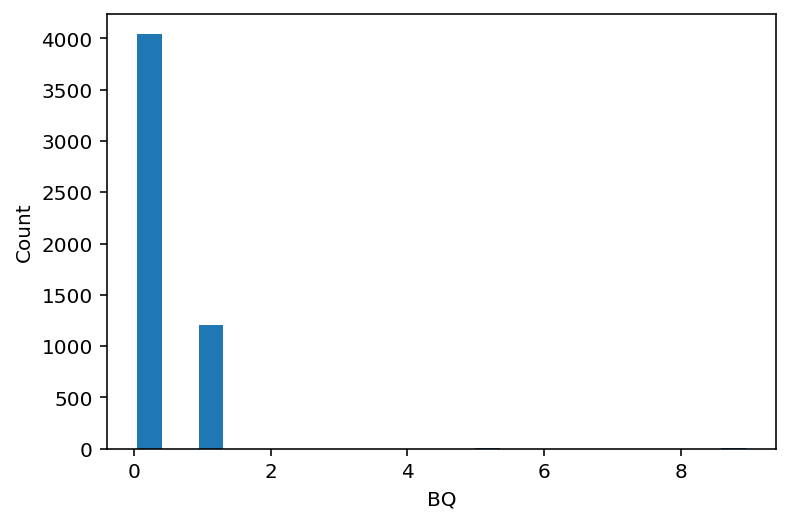

In [41]:
plt.hist(final.BQ, bins=20, rwidth=0.8)
plt.xlabel('BQ')
plt.ylabel('Count')
plt.show()

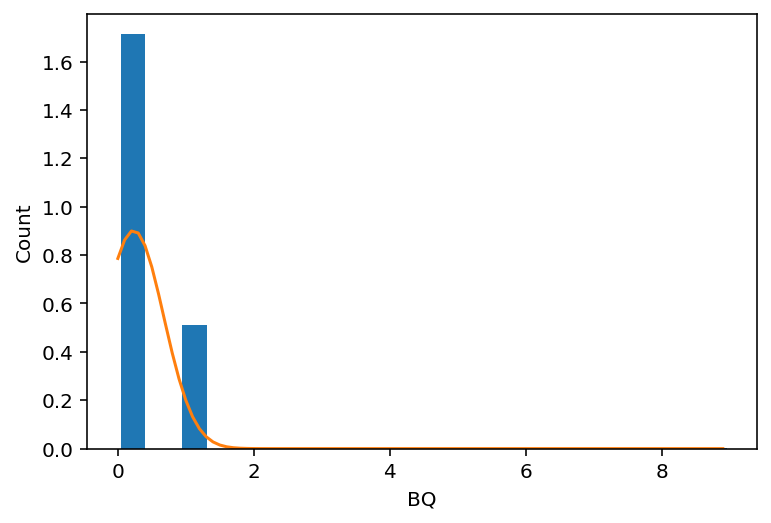

In [42]:
from scipy.stats import norm
import numpy as np
plt.hist(final.BQ, bins=20, rwidth=0.8, density=True)
plt.xlabel('BQ')
plt.ylabel('Count')

rng = np.arange(final.BQ.min(), final.BQ.max(), 0.1)
plt.plot(rng, norm.pdf(rng,final.BQ.mean(),final.BQ.std()))

In [43]:
final.BQ.mean()

0.23192828533282472

In [44]:
final.BQ.std()

0.44240489572969455

In [45]:
upper_limit = final.BQ.mean() + 3*final.BQ.std()
upper_limit

1.5591429725219084

In [46]:
lower_limit = final.BQ.mean() - 3*final.BQ.std()
lower_limit

-1.0952864018562587

In [47]:
final[(final.BQ>upper_limit) | (final.BQ<lower_limit)]

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
2545,9.0,0.0,24.622961,72.0,171.0,57.5,35.0,84.5,94.0,50.0,1,0
4626,5.0,2.0,17.146776,45.0,162.0,51.5,28.0,69.5,87.5,46.0,0,0


In [48]:
df_no_outlier_std_dev = final[(final.BQ<upper_limit) & (final.BQ>lower_limit)]
df_no_outlier_std_dev

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0.0,14.0,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,1,0
1,0.0,8.0,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,1,0
2,0.0,16.0,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,1,0
3,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
4,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5240,1.0,6.0,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,0,3
5241,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5242,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5243,0.0,0.0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,0,3


In [49]:
df_no_outlier_std_dev.shape

(5241, 12)

In [50]:
final.shape

(5245, 12)

In [51]:
new_df = final.fillna(0)
new_df.head()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,1,0
1,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1,0
2,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,1,0
3,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0
4,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0


In [52]:
new_df = final.fillna({
        'BQ': 0,
        'ESS': 0,
        'Buttock': '0'
    })
new_df

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0.0,14.0,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,1,0
1,0.0,8.0,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,1,0
2,0.0,16.0,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,1,0
3,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
4,0.0,15.0,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5240,1.0,6.0,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,0,3
5241,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5242,0.0,13.0,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0,3
5243,0.0,0.0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,0,3


In [53]:
new_df = final.dropna()
new_df.info()
print ('\nMissing values :  ', new_df.isnull().sum().values.sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5241 entries, 0 to 5244
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BQ       5241 non-null   float64
 1   ESS      5241 non-null   float64
 2   BMI      5241 non-null   float64
 3   Weight   5241 non-null   float64
 4   Height   5241 non-null   float64
 5   Head     5241 non-null   float64
 6   Neck     5241 non-null   float64
 7   Waist    5241 non-null   float64
 8   Buttock  5241 non-null   float64
 9   Age      5241 non-null   float64
 10  M        5241 non-null   uint8  
 11  status   5241 non-null   int64  
dtypes: float64(10), int64(1), uint8(1)
memory usage: 496.5 KB

Missing values :   0


In [54]:
from tensorflow import keras
import sklearn
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [55]:
X = new_df.drop('status', axis=1)   # axis=0 for row, axis=1 for column
y = new_df['status']

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (4192, 11)
y_train (4192,)
X_test (1049, 11)
y_test (1049,)


In [ ]:
from sklearn import linear_model,svm, tree
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model1= linear_model.LinearRegression(fit_intercept=True)
svr_poly = svm.SVR(kernel='linear', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
dtree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=0.13, random_state=3)
sv=svm.SVC(C=10,kernel='linear')

In [ ]:
sv.fit(X_train,y_train)

In [ ]:
acc=sv.score(X_test,y_test)
acc

In [ ]:
dtree.fit(X_train,y_train)
acc1=dtree.score(X_test,y_test)
acc1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
#from tensorflow.python.keras.layers.kernelized import RandomFourierFeatures
from tensorflow.keras import layers
